<a href="https://colab.research.google.com/github/prashantiyaramareddy/MyPython-Stuff/blob/master/MachineLearning/Polynomial_Regression_sklearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importing Libraries

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Importing Dataset

In [41]:
dataset = pd.read_csv('Position_Salaries.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [42]:
print(X)

[['Business Analyst' 1]
 ['Junior Consultant' 2]
 ['Senior Consultant' 3]
 ['Manager' 4]
 ['Country Manager' 5]
 ['Region Manager' 6]
 ['Partner' 7]
 ['Senior Partner' 8]
 ['C-level' 9]
 ['CEO' 10]]


In [43]:
print(y)

[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


In [53]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

X = dataset.iloc[:, :-1].values # Re-initialize X from the dataset

ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(handle_unknown='ignore'), [0])], remainder='passthrough')
ct.fit(X)
X = ct.transform(X).toarray()

### Train test split

In [54]:
from sklearn.model_selection import train_test_split
# For such a small dataset, 20–30% test is typical; here we use 20%
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [55]:
print(X_train)

[[ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  6.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  8.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  3.]
 [ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0. 10.]
 [ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  5.]
 [ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  4.]
 [ 0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  7.]]


### Pipeline: encode-> polynomial -> linear regression

In [59]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X_train)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y_train)

LinearRegression()

In [61]:
### Predict on test
X_test_poly = poly_reg.transform(X_test)
y_pred = lin_reg_2.predict(X_test_poly)

In [62]:
print(y_pred)

[582590.42813684  47126.47409955]


In [63]:
print(y_test)

[500000  50000]


### Metrics Calculation

In [64]:
# Metrics
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2score = r2_score(y_test, y_pred)
print("MSE: ", mse)
print("R2 Score: ", r2score)
#

MSE:  3414717985.463644
R2 Score:  0.9325487805340514


### Plot predicted vas Actual

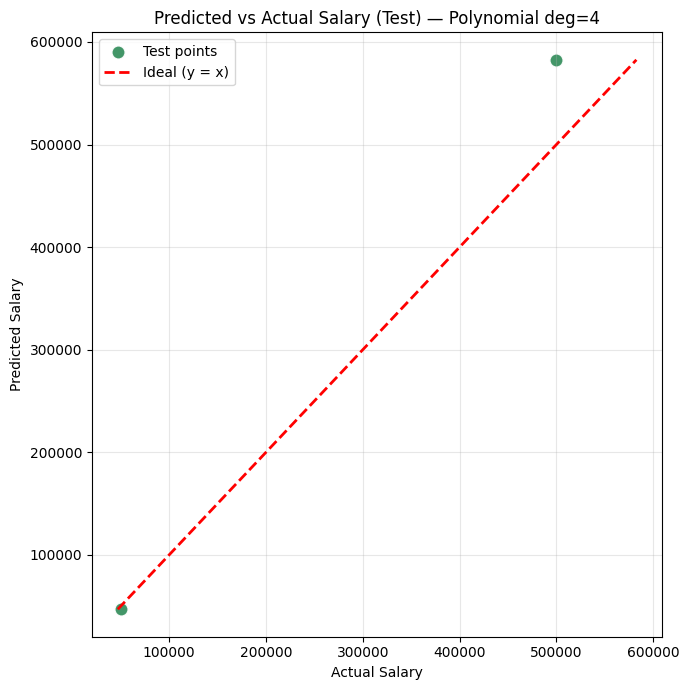

In [65]:
#
plt.figure(figsize=(7,7))
plt.scatter(y_test, y_pred, color='seagreen', s=90, edgecolor='white', alpha=0.9, label='Test points')
min_val = min(y_test.min(), y_pred.min())
max_val = max(y_test.max(), y_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=2, label='Ideal (y = x)')
plt.title(f'Predicted vs Actual Salary (Test) — Polynomial deg={degree}')
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


### Visualizing the Polynomial Regression results

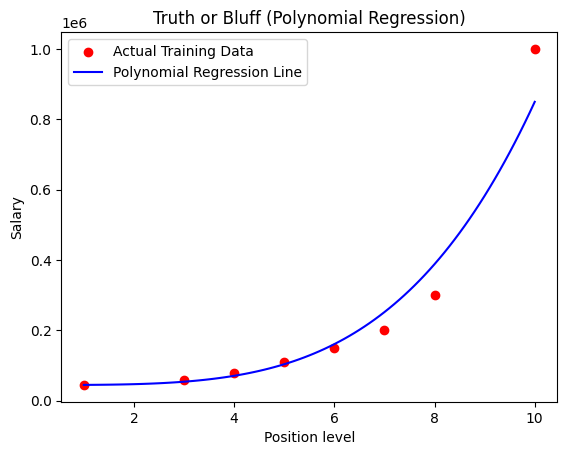

In [67]:
plt.scatter(X_train[:, -1], y_train, color = 'red', label='Actual Training Data')

# Create a smooth range of Position Levels for the regression line
X_plot_levels = np.arange(dataset['Level'].min(), dataset['Level'].max() + 0.1, 0.1).reshape(-1, 1)

# To predict for these smooth levels, we need to construct input features that match
# the format X_train used during training (one-hot encoded features + level).
# We'll use a 'dummy' one-hot encoding (all zeros) for the categorical part,
# assuming we are visualizing the effect of 'Level' independently.
num_ohe_features = X_train.shape[1] - 1
dummy_ohe_part = np.zeros((X_plot_levels.shape[0], num_ohe_features))

# Combine the dummy one-hot encoded part with the smooth levels
X_plot_full = np.hstack((dummy_ohe_part, X_plot_levels))

# Transform these combined features into polynomial features
X_plot_poly = poly_reg.transform(X_plot_full)

# Predict the salaries using the trained linear regression model
y_plot_pred = lin_reg_2.predict(X_plot_poly)

plt.plot(X_plot_levels, y_plot_pred, color='blue', label='Polynomial Regression Line')

plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.legend()
plt.show()